 Performed A/B testing on Biannual survey to measure the attitudes, beliefs, and behavior patterns of the various populations in Europe from 2012-2014

In [ ]:
#prepare for stat analysis and testing


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

survey  = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv")
               

survey.info()
survey.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


Did people become less trusting from 2012 to 2014?

In [ ]:
#creating sepaerate tables/Data Frame for easier analysis  

survey12= survey[survey['year']==6]
survey14= survey[survey['year']==7]

print(survey12.head())
print(survey14.head())

  cntry  idno  year  tvtot  ppltrst  ...  sclmeet  sclact  gndr  agea  partner
0    CH     5     6      3        3  ...        5       4     2    60        1
1    CH    25     6      6        5  ...        3       2     2    59        1
2    CH    26     6      1        8  ...        6       3     1    24        2
3    CH    28     6      4        6  ...        6       2     2    64        1
4    CH    29     6      5        6  ...        7       2     2    55        1

[5 rows x 13 columns]
    cntry  idno  year  tvtot  ppltrst  ...  sclmeet  sclact  gndr  agea  partner
732    CH     5     7      2        8  ...        6       4     1    69        1
733    CH    25     7      4        4  ...        5       3     1    30        1
734    CH    26     7      3        8  ...        7       5     2    49        2
735    CH    28     7      2        7  ...        6       2     1    51        1
736    CH    29     7      2        4  ...        6       2     2    32        2

[5 rows x 13 col

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


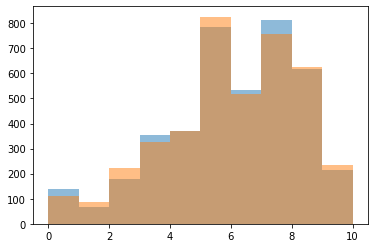

In [ ]:
plt.hist(survey12['ppltrst'], alpha = .5)
plt.hist(survey14['ppltrst'], alpha = .5)

# Remember that Shapiro test is sensitive to large samples. 

stats.shapiro(survey12['ppltrst'])
stats.shapiro(survey14['ppltrst'])

print(stats.describe(survey12['ppltrst']))
print(stats.describe(survey14['ppltrst']))


# This is normally distributed.

In [ ]:
stats.ttest_ind(survey12['ppltrst'], survey14['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

**Fail to reject the null **



-- there is no significant difference in trust between 2012 to 2014.

2.Did people become happier from 2012 to 2014?

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


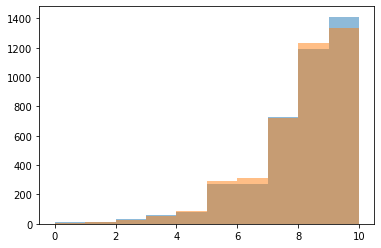

In [ ]:
#we will plot the happy variable and plot hisotgram to view normality 

plt.hist(survey12['happy'], alpha = .5)
plt.hist(survey14['happy'], alpha = .5)

#view stats 
print(stats.describe(survey12['happy']))
print(stats.describe(survey14['happy']))



In [ ]:
#histogram displays data is not normally distributed 
#so we will use Kruskal-Wallis

stats.kruskal(
    survey12['happy'], 
    survey14['happy']
)

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

p value right in threshold 
- We fail to reject the null, no significant difference 

Based on visualization We can conclude data sample are drawn from the same distribution 

3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [ ]:
survey14['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92c04c9da0>,
      dtype=object)

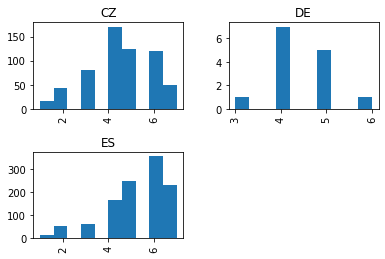

In [ ]:
# I am going to pick CZ, DE and ES

filter_list = ['CZ', 'DE', 'ES']
survey12h = survey14[survey14['cntry'].isin(filter_list)]

survey12h['cntry'].unique()

survey12h['sclmeet'].hist(by = survey12h['cntry'])
